<a href="https://colab.research.google.com/github/sukhada20/astrological_compatibility/blob/main/astrological_compatibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download('aagghh/divorcemarriage-dataset-with-birth-dates')
print('path: ', path)

path:  /root/.cache/kagglehub/datasets/aagghh/divorcemarriage-dataset-with-birth-dates/versions/8


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/aagghh/divorcemarriage-dataset-with-birth-dates/versions/8'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/aagghh/divorcemarriage-dataset-with-birth-dates/versions/8/Comp_matrix.csv
/root/.cache/kagglehub/datasets/aagghh/divorcemarriage-dataset-with-birth-dates/versions/8/descriptions_for_ column.csv
/root/.cache/kagglehub/datasets/aagghh/divorcemarriage-dataset-with-birth-dates/versions/8/divorces_2000-2015_original.csv
/root/.cache/kagglehub/datasets/aagghh/divorcemarriage-dataset-with-birth-dates/versions/8/divorces_2000-2015_translated.csv


In [ ]:
divorce_data = pd.read_csv('/root/.cache/kagglehub/datasets/aagghh/divorcemarriage-dataset-with-birth-dates/versions/8/divorces_2000-2015_translated.csv')
divorce_data

,Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,Age_partner_man,Residence_municipality_partner_man,...,Marriage_certificate_municipality,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody
0,9/6/06,Necesario,MEXICANA,18/12/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5.0,NaN,1.0,NaN
1,1/2/00,Voluntario,MEXICANA,NaN,NaN,NaN,NaN,NaN,47.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,ESTABLECIMIENTO,PREPARATORIA,EMPLEADO,NaN,NaN,NaN,NaN
2,1/2/05,Necesario,MEXICANA,22/2/55,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,49.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,OBRERO,NaN,TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA,NaN,NaN,NaN,NaN
3,1/2/06,Necesario,MEXICANA,20/1/64,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,42.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,EMPLEADO,18.0,NaN,2.0,MADRE
4,1/2/06,Necesario,MEXICANA,30/10/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,COATEPEC,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7.0,NaN,2.0,MADRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,31/10/12,Voluntario,MEXICANA,29/10/77,MORELIA,MORELIA,MICHOACAN,MEXICO,35.0,MORELIA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,3.0,11.0,NaN,NaN
4919,31/10/13,Voluntario,MEXICANA,10/11/82,VERACRUZ,VERACRUZ,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,1.0,NaN,NaN,NaN
4920,31/10/13,Voluntario,MEXICANA,28/10/54,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,59.0,EMILIANO ZAPATA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,35.0,NaN,2.0,NaN
4921,31/12/12,Voluntario,MEXICANA,7/2/58,TLAPACOYAN,TLAPACOYAN,VERACRUZ,MEXICO,54.0,XALAPA,...,TLAPACOYAN,VERACRUZ,PREPARATORIA,NaN,PRIMARIA,NO TRABAJA,33.0,NaN,2.0,NaN


In [ ]:
divorce_data.drop(columns=divorce_data.columns.difference(['DOB_partner_man','DOB_partner_woman']), inplace=True)
divorce_data.head()

,DOB_partner_man,DOB_partner_woman
0,18/12/75,8/1/83
1,NaN,NaN
2,22/2/55,21/3/47
3,20/1/64,NaN
4,30/10/75,13/10/78


<Axes: >

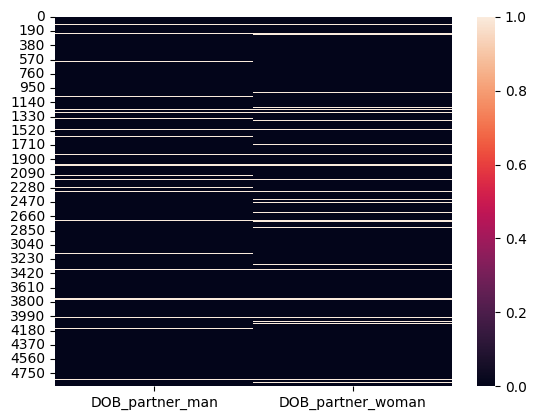

In [ ]:
sns.heatmap(divorce_data.isnull())

<bound method NDFrame.head of      DOB_partner_man DOB_partner_woman
0           18/12/75            8/1/83
2            22/2/55           21/3/47
4           30/10/75          13/10/78
5            28/3/73           14/6/76
6           13/12/70           4/11/71
...              ...               ...
4918        29/10/77           12/1/78
4919        10/11/82            9/2/81
4920        28/10/54           17/2/57
4921          7/2/58           27/1/64
4922         22/6/60           22/1/72

[4374 rows x 2 columns]>

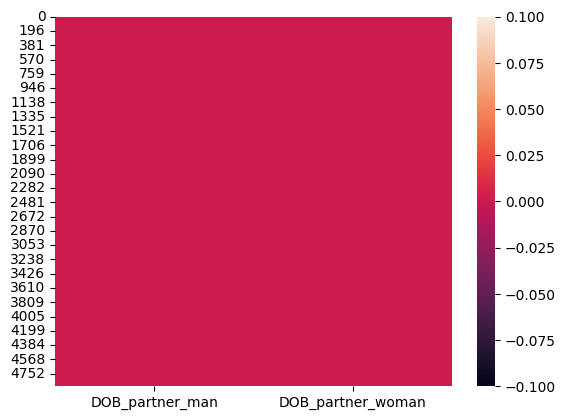

In [ ]:
divorce_data = divorce_data.dropna()
sns.heatmap(divorce_data.isnull())
divorce_data.head

In [ ]:
divorce_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4374 entries, 0 to 4922
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOB_partner_man    4374 non-null   object
 1   DOB_partner_woman  4374 non-null   object
dtypes: object(2)
memory usage: 102.5+ KB


In [ ]:
divorce_data[['DOB_partner_man', 'DOB_partner_woman']] = divorce_data[['DOB_partner_man', 'DOB_partner_woman']].apply(pd.to_datetime)
divorce_data['day_partner_1'], divorce_data['month_partner_1'] = divorce_data['DOB_partner_man'].apply(lambda x: x.day), divorce_data['DOB_partner_man'].apply(lambda x: x.month)
divorce_data['day_partner_2'], divorce_data['month_partner_2'] = divorce_data['DOB_partner_woman'].apply(lambda x: x.day), divorce_data['DOB_partner_woman'].apply(lambda x: x.month)
divorce_data = divorce_data.drop(['DOB_partner_man', 'DOB_partner_woman'], axis=1)
divorce_data.head(10)

<ipython-input-39-f243082d1ca7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  divorce_data[['DOB_partner_man', 'DOB_partner_woman']] = divorce_data[['DOB_partner_man', 'DOB_partner_woman']].apply(pd.to_datetime)
<ipython-input-39-f243082d1ca7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  divorce_data[['DOB_partner_man', 'DOB_partner_woman']] = divorce_data[['DOB_partner_man', 'DOB_partner_woman']].apply(pd.to_datetime)
<ipython-input-39-f243082d1ca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,day_partner_1,month_partner_1,day_partner_2,month_partner_2
0,18,12,1,8
2,22,2,21,3
4,30,10,13,10
5,28,3,14,6
6,13,12,11,4
7,17,2,27,8
8,12,2,1,3
9,17,11,13,3
10,6,4,16,2
11,13,11,13,5


In [ ]:
def zodiac_sign(day, month):

    if month == 12:
        return 'Sagittarius' if (day < 22) else 'Capricorn'

    elif month == 1:
        return 'Capricorn' if (day < 20) else 'Aquarius'

    elif month == 2:
        return 'Aquarius' if (day < 19) else 'Pisces'

    elif month == 3:
        return 'Pisces' if (day < 21) else 'Aries'

    elif month == 4:
        return 'Aries' if (day < 20) else 'Taurus'

    elif month == 5:
        return 'Taurus' if (day < 21) else 'Gemini'

    elif month == 6:
        return 'Gemini' if (day < 21) else 'Cancer'

    elif month == 7:
        return 'Cancer' if (day < 23) else 'Leo'

    elif month == 8:
        return 'Leo' if (day < 23) else 'Virgo'

    elif month == 9:
        return 'Virgo' if (day < 23) else 'Libra'

    elif month == 10:
        return 'Libra' if (day < 23) else 'Scorpio'

    elif month == 11:
        return 'Scorpio' if (day < 22) else 'Sagittarius'

In [ ]:
divorce_data['Zodiac_sign_partner_1'] = divorce_data.apply(lambda x: zodiac_sign(x['day_partner_1'], x['month_partner_1']), axis=1)
divorce_data['Zodiac_sign_partner_2'] = divorce_data.apply(lambda x: zodiac_sign(x['day_partner_2'], x['month_partner_2']), axis=1)

In [ ]:
divorce_data.head(10)

,day_partner_1,month_partner_1,day_partner_2,month_partner_2,Zodiac_sign_partner_1,Zodiac_sign_partner_2
0,18,12,1,8,Sagittarius,Leo
2,22,2,21,3,Pisces,Aries
4,30,10,13,10,Scorpio,Libra
5,28,3,14,6,Aries,Gemini
6,13,12,11,4,Sagittarius,Aries
7,17,2,27,8,Aquarius,Virgo
8,12,2,1,3,Aquarius,Pisces
9,17,11,13,3,Scorpio,Pisces
10,6,4,16,2,Aries,Aquarius
11,13,11,13,5,Scorpio,Taurus


In [ ]:
divorce_data.drop(columns=divorce_data.columns.difference(['Zodiac_sign_partner_1', 'Zodiac_sign_partner_2']), inplace=True)
divorce_data.head(10)

,Zodiac_sign_partner_1,Zodiac_sign_partner_2
0,Sagittarius,Leo
2,Pisces,Aries
4,Scorpio,Libra
5,Aries,Gemini
6,Sagittarius,Aries
7,Aquarius,Virgo
8,Aquarius,Pisces
9,Scorpio,Pisces
10,Aries,Aquarius
11,Scorpio,Taurus


<ipython-input-44-e69d876f462a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Zodiac_sign_partner_1", data=divorce_data, palette="PuBu").set_title('Men Zodiac Signs')
<ipython-input-44-e69d876f462a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Zodiac_sign_partner_2", data=divorce_data, palette="gist_earth").set_title('Women Zodiac Signs')


Text(0, 0.5, 'count of zodiacs')

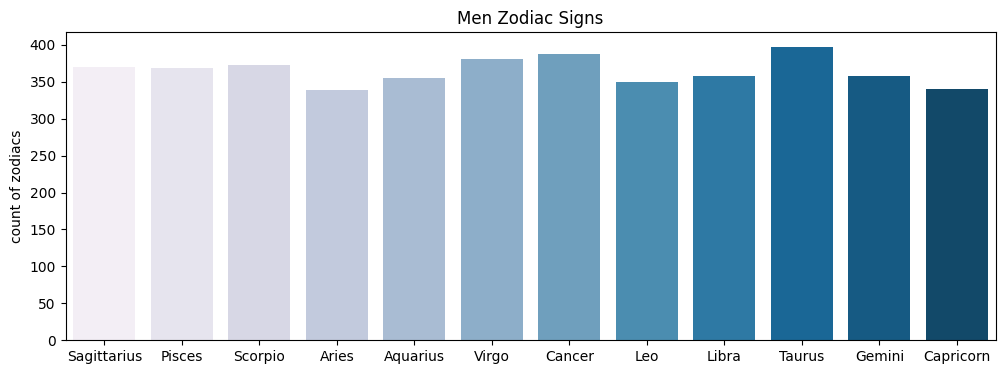

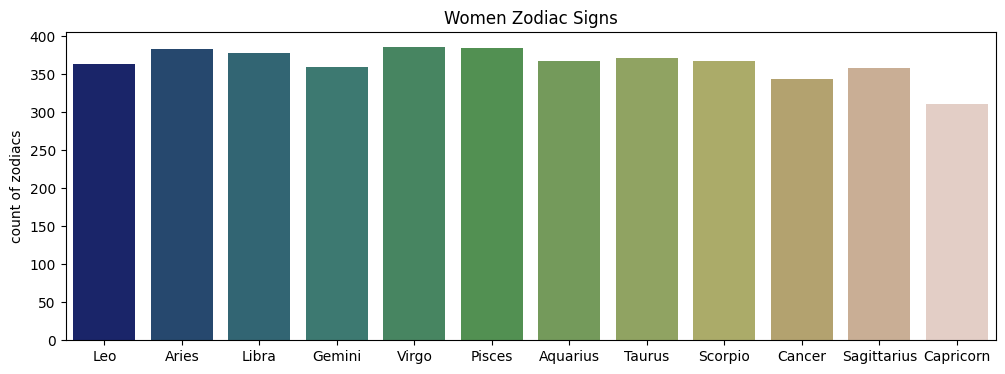

In [ ]:
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Zodiac_sign_partner_1", data=divorce_data, palette="PuBu").set_title('Men Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")

plt.figure(figsize=(12,4))
plot = sns.countplot(x="Zodiac_sign_partner_2", data=divorce_data, palette="gist_earth").set_title('Women Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")

In [ ]:
adjacency_matrix = pd.crosstab(divorce_data.Zodiac_sign_partner_1, divorce_data.Zodiac_sign_partner_2)
idx = adjacency_matrix.columns.union(adjacency_matrix.index)
adjacency_matrix = adjacency_matrix.reindex(index = idx, columns=idx, fill_value=0)
adjacency_matrix.head(12)

,Aquarius,Aries,Cancer,Capricorn,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo
Aquarius,35,34,28,26,32,32,23,24,26,34,32,29
Aries,35,23,25,27,29,35,32,24,28,24,30,27
Cancer,40,33,35,21,21,31,36,43,32,35,24,36
Capricorn,26,33,29,28,31,31,13,39,33,27,25,25
Gemini,29,29,22,28,30,40,36,25,22,32,30,34
Leo,24,25,28,20,35,28,31,28,29,27,40,34
Libra,29,29,29,21,29,25,35,32,26,30,37,35
Pisces,25,40,28,33,25,25,35,33,33,32,33,27
Sagittarius,35,37,33,26,26,25,35,24,36,27,32,34
Scorpio,33,35,23,31,24,27,38,33,28,33,36,32


<ipython-input-47-ba56b283de36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Zodiac_combinations", data=divorce_data, palette="cividis_r").set_title('Zodiac Signs Combinations')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143],
 [Text(0, 0, 'SagittariusLeo'),
  Text(1, 0, 'PiscesAries'),
  Text(2, 0, 'ScorpioLibra'),
  Text(3, 

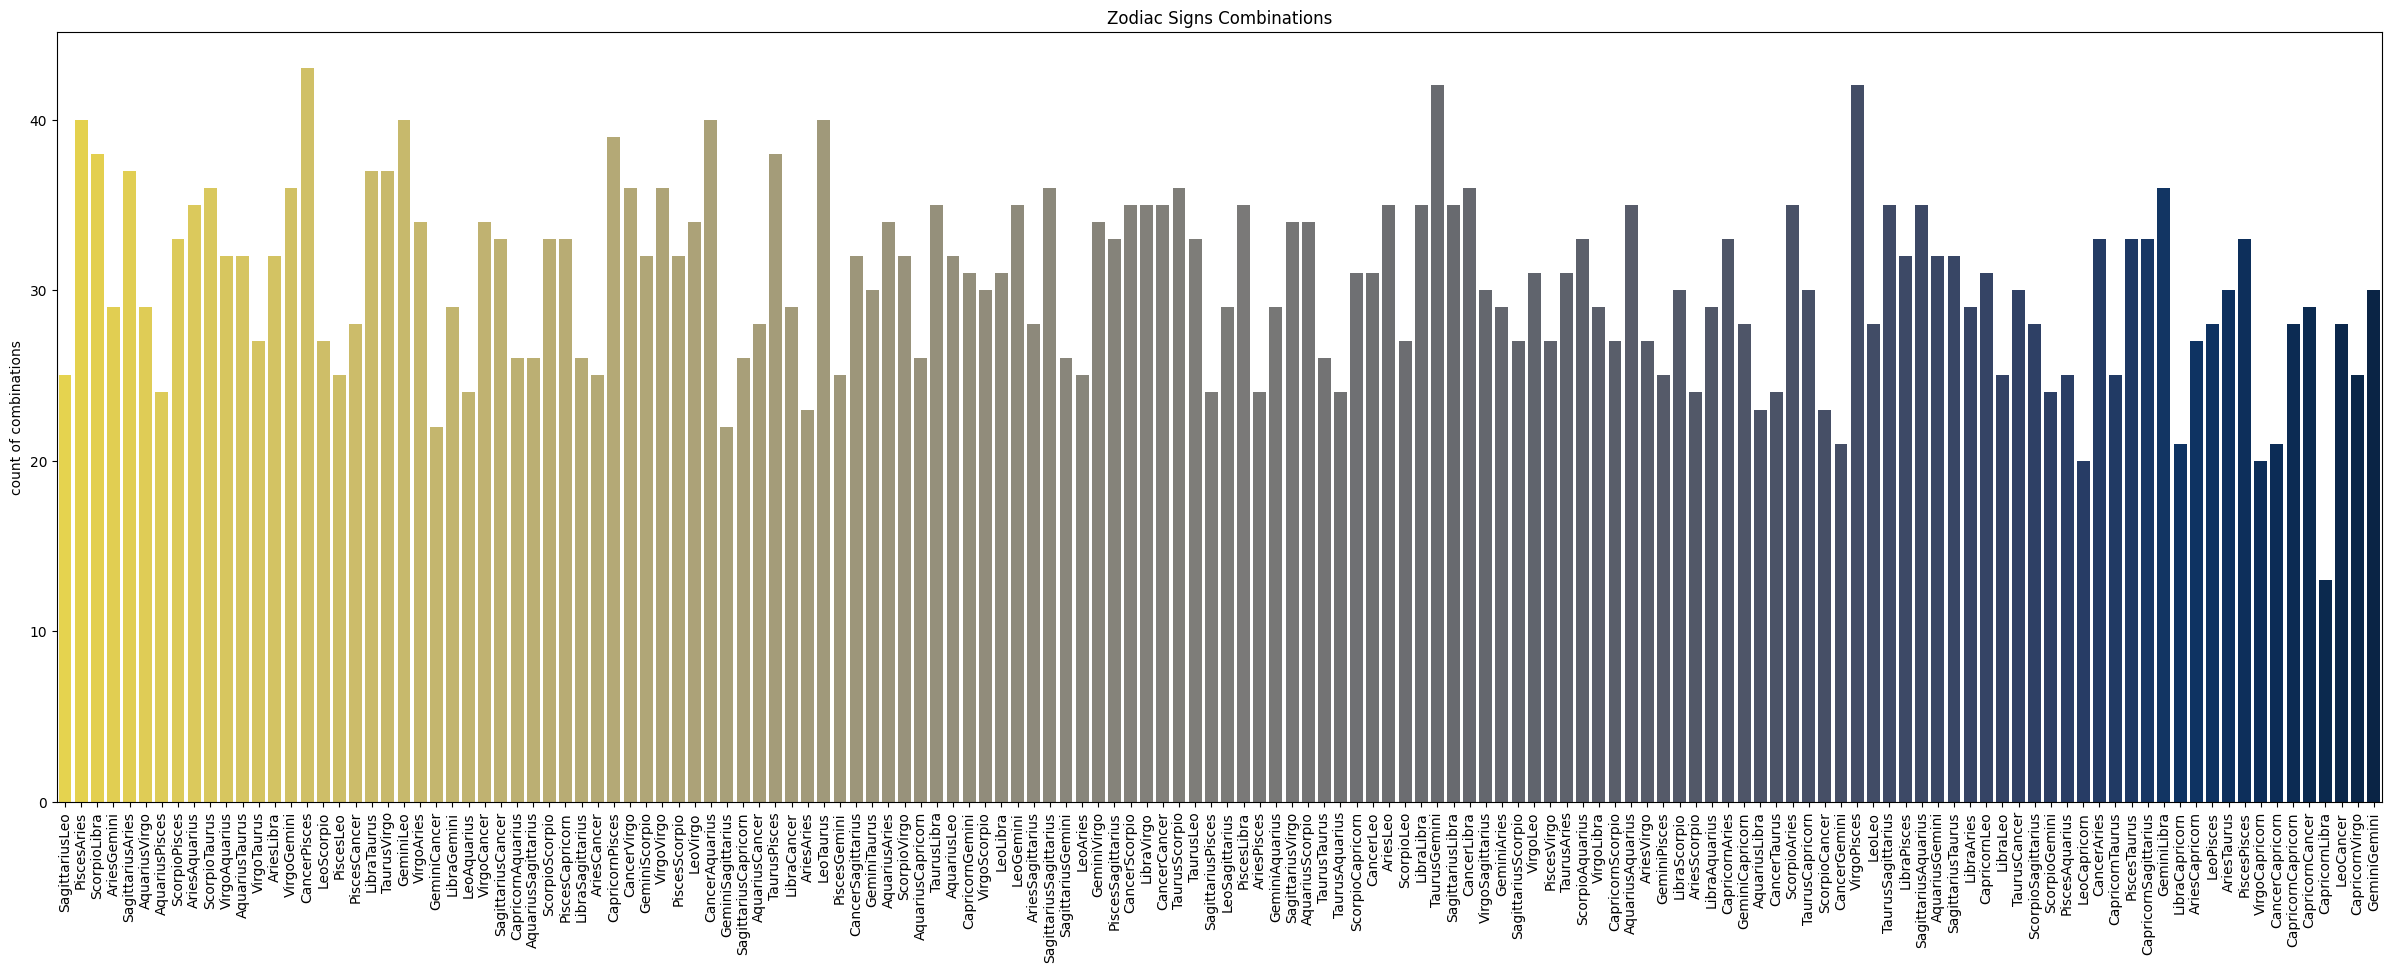

In [ ]:
divorce_data['Zodiac_combinations'] = divorce_data['Zodiac_sign_partner_1'] + divorce_data['Zodiac_sign_partner_2']
plt.figure(figsize=(30,10))
plot = sns.countplot(x="Zodiac_combinations", data=divorce_data, palette="cividis_r").set_title('Zodiac Signs Combinations')
plt.xlabel("")
plt.ylabel("count of combinations")
plt.xticks(rotation=90)

<ipython-input-48-31845638f947>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(divorce_data['Zodiac_combinations'].value_counts(), fit=norm);


Text(0.5, 0, '')

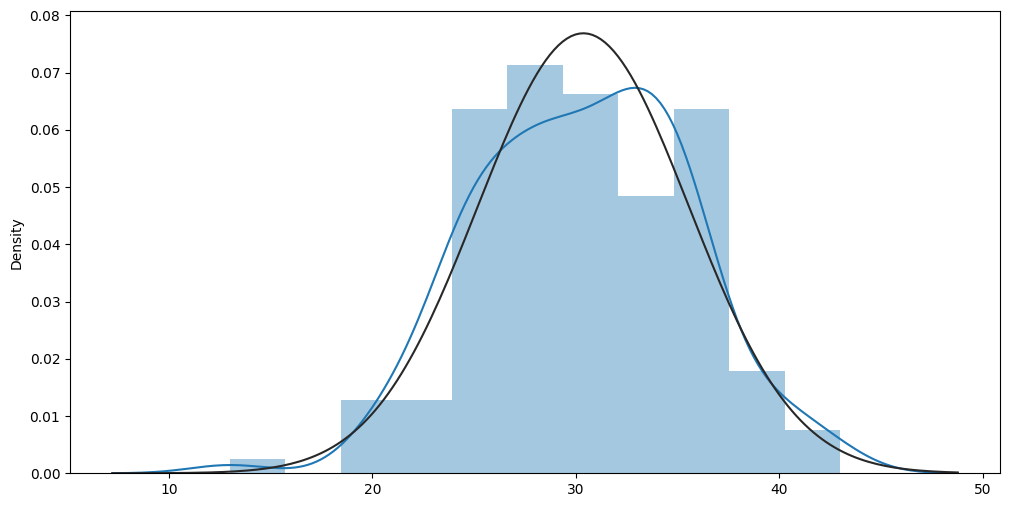

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(divorce_data['Zodiac_combinations'].value_counts(), fit=norm);
plt.xlabel("")

In [ ]:
comp_matrix = pd.read_csv('/root/.cache/kagglehub/datasets/aagghh/divorcemarriage-dataset-with-birth-dates/versions/8/Comp_matrix.csv')
comp_matrix.head(10)

,Zodiac_combination,Compatibility_rate
0,CancerPisces,0.98
1,TaurusGemini,0.33
2,VirgoPisces,0.88
3,PiscesAries,0.67
4,CancerAquarius,0.27
5,GeminiLeo,0.88
6,LeoTaurus,0.73
7,CapricornPisces,0.88
8,ScorpioLibra,0.35
9,TaurusPisces,0.85


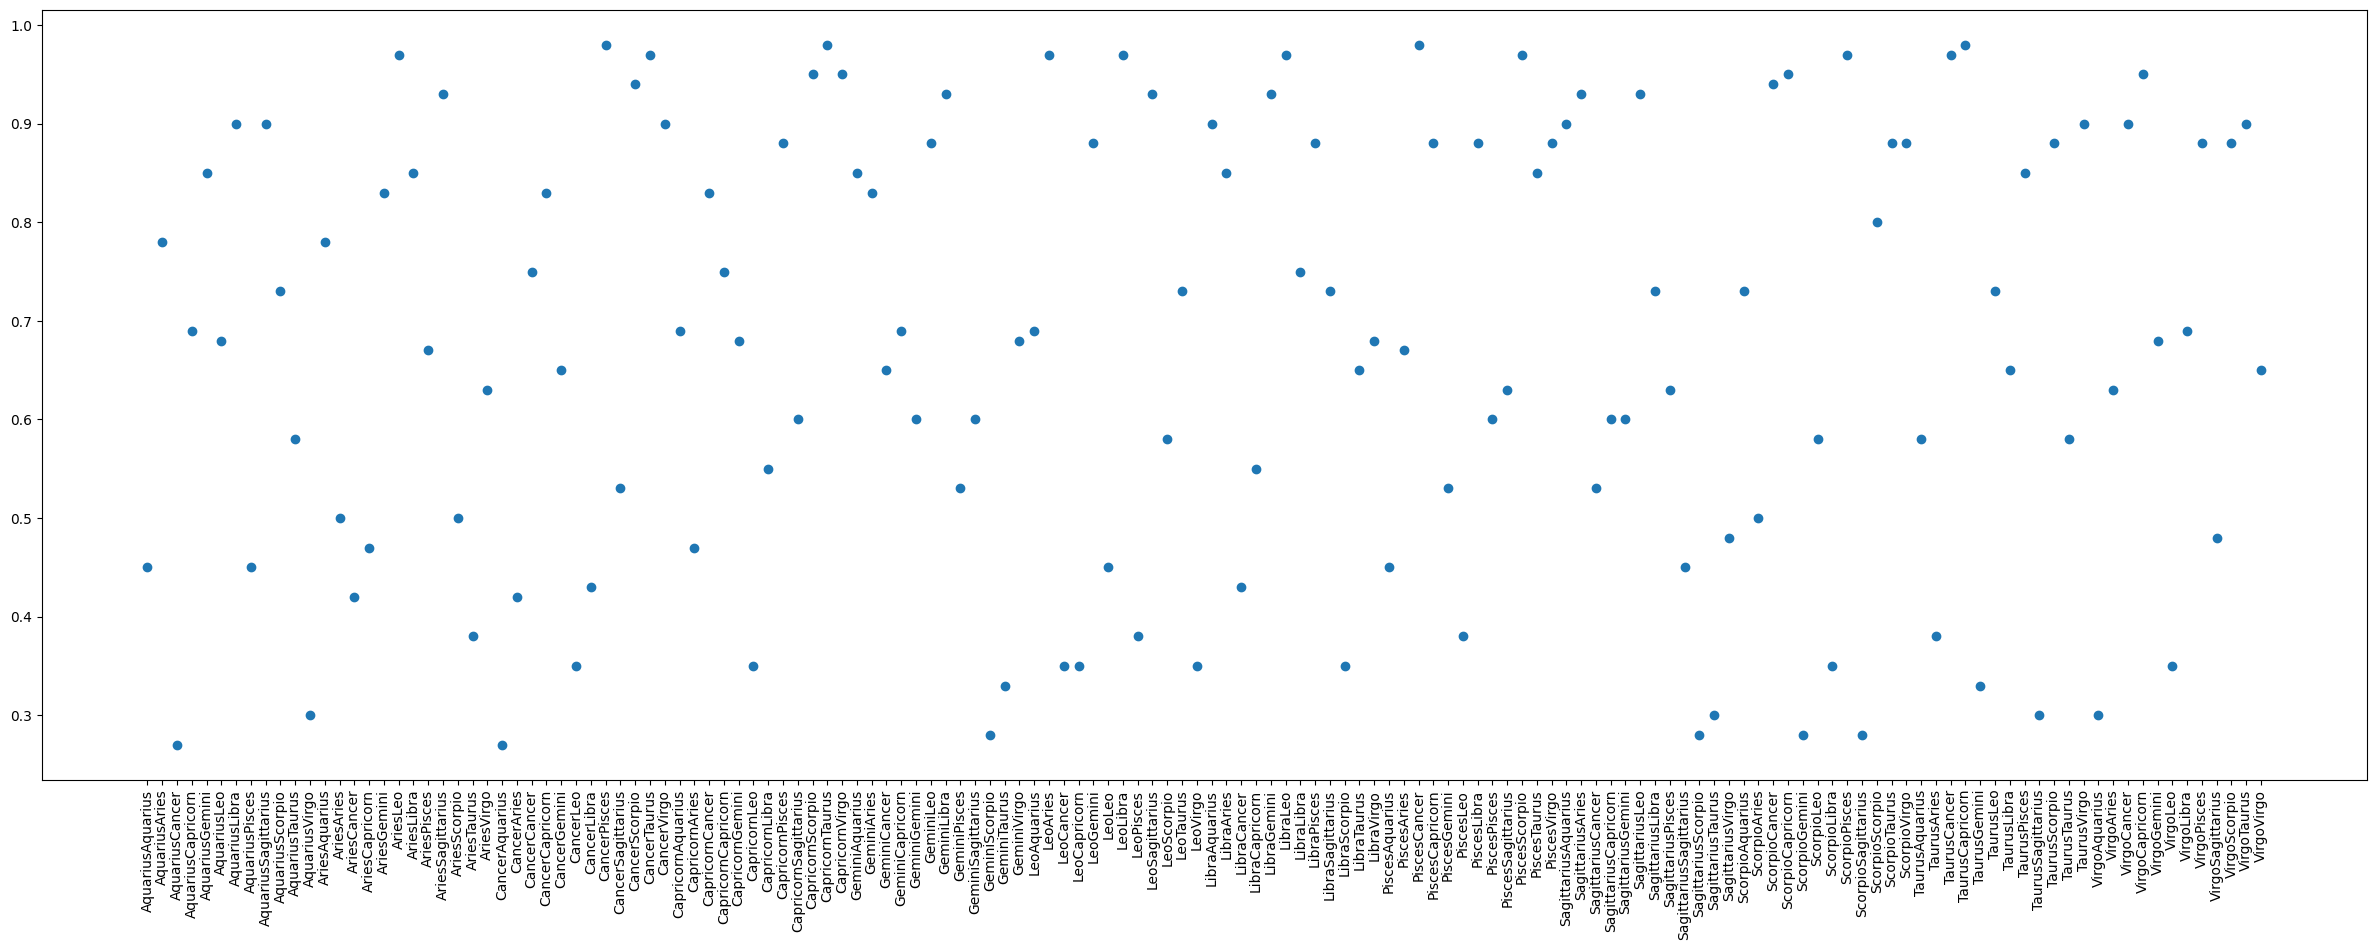

In [ ]:
plt.figure(figsize=(30,10))
x, comb = np.unique(comp_matrix['Zodiac_combination'], return_inverse=True)
plt.scatter(comb, comp_matrix['Compatibility_rate'])
plt.xticks(range(len(x)), x)
plt.xticks(rotation=90)
plt.show()

<ipython-input-51-f9d957b75038>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp_matrix['Compatibility_rate'], fit=norm);


Text(0.5, 0, '')

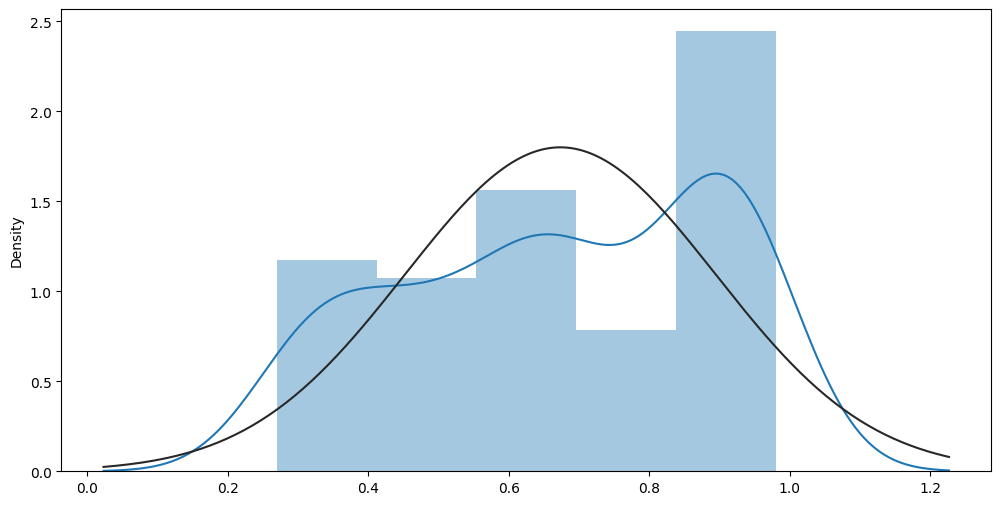

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(comp_matrix['Compatibility_rate'], fit=norm);
plt.xlabel("")

In [ ]:
comp_matrix['Compatibility_rate'].describe()

,Compatibility_rate
count,144.000000
mean,0.673472
std,0.222363
min,0.270000
25%,0.480000
50%,0.680000
75%,0.880000
max,0.980000


In [ ]:
compatibility_fit_labels = ['Bad_fit', 'Good_fit']
comp_matrix['Compatibility'] = pd.qcut(comp_matrix['Compatibility_rate'], q= [0, .5, 1], labels=compatibility_fit_labels)

In [ ]:
comp_matrix['Compatibility'].value_counts()

,count
Compatibility,
Bad_fit,73
Good_fit,71


In [ ]:
comp_matrix = comp_matrix.rename(columns={'Zodiac_combination': 'Zodiac_combinations'})
cols = ['Zodiac_combinations']
divorce_data = divorce_data.join(comp_matrix.set_index(cols), on=cols)
divorce_data

,Zodiac_sign_partner_1,Zodiac_sign_partner_2,Zodiac_combinations,Compatibility_rate,Compatibility
0,Sagittarius,Leo,SagittariusLeo,0.93,Good_fit
2,Pisces,Aries,PiscesAries,0.67,Bad_fit
4,Scorpio,Libra,ScorpioLibra,0.35,Bad_fit
5,Aries,Gemini,AriesGemini,0.83,Good_fit
6,Sagittarius,Aries,SagittariusAries,0.93,Good_fit
...,...,...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius,0.28,Bad_fit
4919,Libra,Virgo,LibraVirgo,0.68,Bad_fit
4920,Scorpio,Aquarius,ScorpioAquarius,0.73,Good_fit
4921,Cancer,Aquarius,CancerAquarius,0.27,Bad_fit


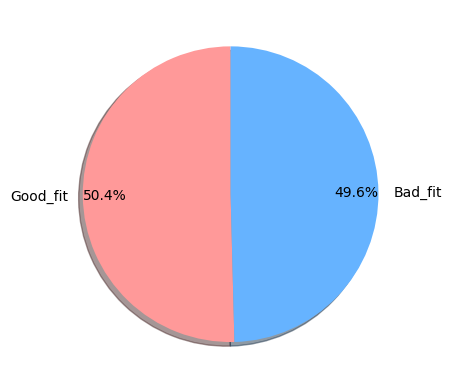

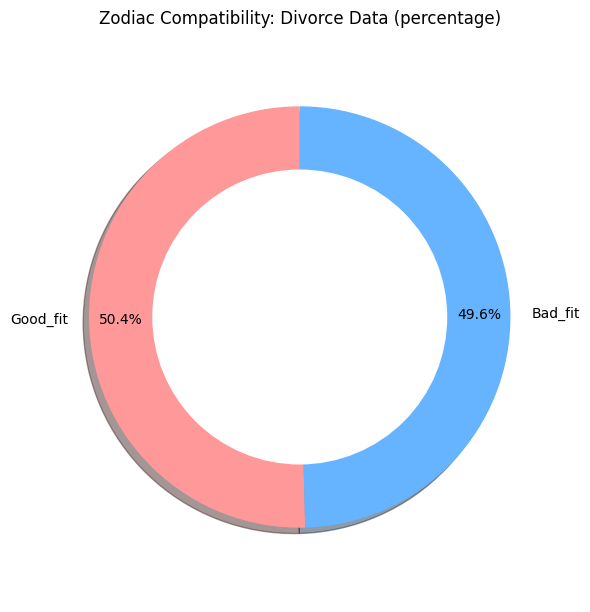

In [ ]:
labels = ['Good_fit', 'Bad_fit']
sizes = divorce_data['Compatibility'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
labels = ['Good_fit', 'Bad_fit']
sizes = divorce_data['Compatibility'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(6,6)
ax1.axis('equal')
plt.tight_layout()
plt.title('Zodiac Compatibility: Divorce Data (percentage)')
plt.show()

plt.show()

Text(0, 0.5, '')

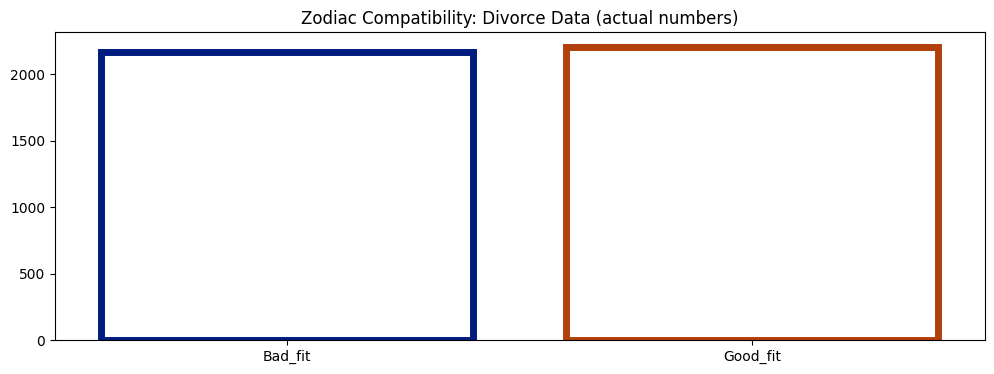

In [ ]:
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Compatibility", data=divorce_data, facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3)).set_title('Zodiac Compatibility: Divorce Data (actual numbers)')
plt.xlabel("")
plt.ylabel("")

In [ ]:
divorce_data['Compatibility'].value_counts()

,count
Compatibility,
Good_fit,2205
Bad_fit,2169
